TODO ADD INTRO

We first import the necessary libraries.

In [319]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as tk
from matplotlib.dates import DateFormatter

%matplotlib inline





We will first begin by optaining the required data of the analysis. 

By visiting the National Oceanic and Atmospheric Administration's National Centers for Environmental Information website, we specify the date range of the dataset **(1955-01-01 to 2021-10-20)**. We also need to provide the type of data we require, which in our case is **Daily Summaries**. Finally, we need to specify our search terms. In our case we will measure the Daily Summaries of Hellinikon weather station, so this is our search term.

The search tool returns us the data from the Hellinikon weather station. The tool also prompts us to specify various other preferences:

* The format of the data: in our case .csv format is selected
* Additional data to include: by reading the assignment description and the documentation, it is noticed that the Average Temperature (TAVG) and Precipitation (PRCP) are required for the analysis and are therefore selected.
* We also selected the option to include data headers in order to facilitate the organization of the data.
* Finally, the metric system is selected as the dataset unit of measurement.

After specifying the above, we download the required dataset. For portability reasons, the data are accessed from a personal access folder.

We also need to download the alternative Athens weather dataset from the Hellenic Data Service, again available in .csv format. 


We then proceed to read the two csv files and create two DataFrames.

By reading the dataset's documentation, we can resolve the contents of each column:

* **DATE** represents the date of the measurement. - (YYYY-MM-DD)
* **STATION** represents the station code, that in out case is the code of the Helinikon weather station.
* **PRCP** represents the precipitation, or the total daily rainfall. - (mm)
* **PRCP_ATTRIBUTES** contain a list of different attributes of the percipitation measurement.
* **TAVG** represents the average daily temperature. - (Degrees Celsius)



In [320]:
noaa_filename = "data/NOAA.csv"
data = pd.read_csv(noaa_filename, 
                   parse_dates=['DATE']) 

We notice that the secondary data file does not contain any headers. Fortunately, with some searching in the dataset's description (although not well documented), it is specified that the dataset columns describe the following:

* col.  1 represents the date of the measurement. - (YYYY-MM-DD)
* cols. 2 - 4 represent the average, maximum and minimum daily temperature (in that order). - (Degrees Celsius)
* cols. 5 - 7 represent the average, maximum and minimum relative humidity. - (%)
* cols. 8 - 10 represent the average, maximum and minimum atmospheric pressure. - (hPa)
* col. 11 represents the total daily rainfall. - (mm) 
* col. 12 represents the average wind speed. - (km/h)
* col. 12 represents the wind direction.
* col. 12 represents the maximum gust of wind speed. - (km/h)

We are careful to name the columns that describe the same measurements with the same name, in order to facilitate further processing. Even though the measurements are from different weather stations of Athens (the secondary data come from a station close to the centre of Athens, whereas the Hellinicon weather station is located in the southern part of Athens), for the purposes of the assignment, we take for granted that this does not affect the results.

We therefore create the headers and assign them manually. The names of the other columns are related to their contents, but we will not further explan their names as they will not be used in the analysis.

In [321]:
hds_filename = "data/HDS.csv"

secondary_data_headers = ["DATE", "TAVG", "TMAX", "TMIN", "HAVG", "HMAX", "HMIN", 
                          "PAVG", "PMAX", "PMIN", "PRCP", "WSPD", "WDIR", "GSPD"]

secondary_data = pd.read_csv(hds_filename,
                             names=secondary_data_headers,
                             na_values="---",
                   parse_dates=['DATE'])



* After a careful examination of the csv file, it was also noticed that the missing values of the dataset were marked with **"---"**, which is also specified above.

* It was noticed that the missing value of the dataset was the characters "---"After reading the files we are left with the following DataFrames:

In [322]:
data

,STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,GR000016716,1955-01-01,0.0,",,E",NaN,NaN
1,GR000016716,1955-01-02,2.0,",,E",NaN,NaN
2,GR000016716,1955-01-03,0.0,",,E",NaN,NaN
3,GR000016716,1955-01-04,0.0,",,E",NaN,NaN
4,GR000016716,1955-01-05,0.0,",,E",NaN,NaN
...,...,...,...,...,...,...
23532,GR000016716,2021-10-13,0.0,",,S",19.8,"H,,S"
23533,GR000016716,2021-10-14,5.6,",,S",17.5,"H,,S"
23534,GR000016716,2021-10-15,79.2,",,S",19.7,"H,,S"
23535,GR000016716,2021-10-16,2.5,",,S",19.9,"H,,S"


In [323]:
secondary_data

,DATE,TAVG,TMAX,TMIN,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,PRCP,WSPD,WDIR,GSPD
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


We will now explore the primary dataset.

In [324]:
data.describe()

,PRCP,TAVG
count,23024.000000,21226.000000
mean,1.007284,18.306492
std,4.640332,6.937514
min,0.000000,-2.000000
25%,0.000000,12.800000
50%,0.000000,17.800000
75%,0.000000,24.300000
max,142.000000,34.800000


In [325]:
data.TAVG.value_counts()

 13.9    145
 13.1    145
 14.2    144
 13.3    142
 14.9    142
        ... 
-1.1       1
 32.5      1
 1.0       1
 2.6       1
 0.4       1
Name: TAVG, Length: 348, dtype: int64

In [326]:
data.PRCP.value_counts()

0.0     19138
0.3       227
0.1       226
0.2       215
0.5       168
        ...  
23.2        1
50.0        1
29.8        1
35.0        1
79.2        1
Name: PRCP, Length: 371, dtype: int64

* At a first glance we see that no extreme values do exist.
* It is also worth mentioning that it rained less than 25% of the days, which makes sense in a country such as Greece.

Now let's explore the any existence of missing values. We only care about the absence of TAVG and PRCP values as these are the columns that we are interested in. Therefore, we first need to have an overview of any absent temperature or percipitation data.

In [327]:
data[data['PRCP'].isnull() | data['TAVG'].isnull()]

,STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,GR000016716,1955-01-01,0.0,",,E",NaN,NaN
1,GR000016716,1955-01-02,2.0,",,E",NaN,NaN
2,GR000016716,1955-01-03,0.0,",,E",NaN,NaN
3,GR000016716,1955-01-04,0.0,",,E",NaN,NaN
4,GR000016716,1955-01-05,0.0,",,E",NaN,NaN
...,...,...,...,...,...,...
23503,GR000016716,2021-09-14,NaN,NaN,25.8,"H,,S"
23521,GR000016716,2021-10-02,NaN,NaN,18.9,"H,,S"
23528,GR000016716,2021-10-09,NaN,NaN,20.6,"H,,S"
23530,GR000016716,2021-10-11,NaN,NaN,21.8,"H,,S"


In [328]:
data[data['TAVG'].isnull()].count()

STATION            2311
DATE               2311
PRCP               2308
PRCP_ATTRIBUTES    2308
TAVG                  0
TAVG_ATTRIBUTES       0
dtype: int64

In [329]:
data[data['PRCP'].isnull()].count()

STATION            513
DATE               513
PRCP                 0
PRCP_ATTRIBUTES      0
TAVG               510
TAVG_ATTRIBUTES    510
dtype: int64

We have spotted 2821 missing values. From these 2311 are about missing temperature data and 513 are about missing precipotation data.

We are now going to analyze the secondary dataset. We won't be needing all the data so we remove the unecessary ones.

In [330]:
secondary_data = secondary_data.drop(["TMAX", "TMIN", "HAVG", "HMAX", "HMIN", "PAVG", "PMAX", "PMIN", "WSPD", "WDIR", "GSPD"], axis=1)

At this point, something is not quite wright. 

In [331]:
secondary_data.describe()

,TAVG,PRCP
count,3649.000000,3652.000000
mean,19.443245,1.255531
std,7.143639,4.993957
min,0.800000,0.000000
25%,13.700000,0.000000
50%,18.900000,0.000000
75%,25.800000,0.000000
max,35.300000,97.000000


In [332]:
data.TAVG.value_counts()

 13.9    145
 13.1    145
 14.2    144
 13.3    142
 14.9    142
        ... 
-1.1       1
 32.5      1
 1.0       1
 2.6       1
 0.4       1
Name: TAVG, Length: 348, dtype: int64

In [333]:
data.PRCP.value_counts()

0.0     19138
0.3       227
0.1       226
0.2       215
0.5       168
        ...  
23.2        1
50.0        1
29.8        1
35.0        1
79.2        1
Name: PRCP, Length: 371, dtype: int64

We notice similar trends to the first dataset. There is an absence of extreme values, which means that the data are presumably valid.

We are now going to fill the missing data from the NOAA by combining the two datasets. If both measurements are present, we will be keeping the data provided in the primary dataset. 

In [334]:
combined_data  = pd.merge(  data[["DATE", "TAVG", "PRCP"]],
                            secondary_data[["DATE", "TAVG", "PRCP"]],
                            on=["DATE"],
                            how="outer")


combined_data["PRCP"] = np.where(combined_data.PRCP_x.isna(), combined_data.PRCP_y, combined_data.PRCP_x)
combined_data["TAVG"] = np.where(combined_data.TAVG_x.isna(), combined_data.TAVG_y, combined_data.TAVG_x)

combined_data = combined_data.drop(columns=["TAVG_x", "TAVG_y", "PRCP_x", "PRCP_y"])

combined_data["YEAR"] = combined_data.DATE.dt.year
combined_data["DAY"] = combined_data.DATE.dt.dayofyear

# Exclude 2021
combined_data = combined_data[combined_data["DATE"].dt.year < 2021]
combined_data = combined_data.sort_values("DATE")
combined_data


,DATE,PRCP,TAVG,YEAR,DAY
0,1955-01-01,0.0,NaN,1955,1
1,1955-01-02,2.0,NaN,1955,2
2,1955-01-03,0.0,NaN,1955,3
3,1955-01-04,0.0,NaN,1955,4
4,1955-01-05,0.0,NaN,1955,5
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,2020,362
23247,2020-12-28,6.6,14.8,2020,363
23248,2020-12-29,0.0,16.3,2020,364
23249,2020-12-30,0.0,16.4,2020,365


Q2

Firstly, we need to calculate the mean summer temperature for every time period. For this reason we will create bins containing the temperatures of every summer

In [336]:
summers = combined_data[combined_data.DATE.dt.month.between(6,8)].copy()

summer_means = summers.groupby(summers["DATE"].dt.year).mean()
summer_means

,PRCP,TAVG,YEAR,DAY
DATE,,,,
1955,0.206522,NaN,1955.0,197.5
1956,0.029348,NaN,1956.0,198.5
1957,0.043478,28.091935,1957.0,197.5
1958,0.033696,27.081522,1958.0,197.5
1959,0.205435,NaN,1959.0,197.5
...,...,...,...,...
2016,0.077174,28.154348,2016.0,198.5
2017,0.470652,28.088043,2017.0,197.5
2018,0.667391,27.436957,2018.0,197.5


Now we will calculate the average summer temperature for the time period of 1974-1999.

In [337]:
baseline_temp = summer_means.loc[1974:1999]["TAVG"]
baseline_temp = baseline_temp.mean()
baseline_temp

summer_means["DEV"] = summer_means["TAVG"] - baseline_temp
summer_means["ROLLING"] = summer_means["DEV"].rolling(window=10, min_periods=1).mean()

summer_means = summer_means.drop(columns="TAVG")
summer_means = summer_means.reset_index()
summer_means = summer_means.drop(columns="DATE")
summer_means["POSITIVE"] = summer_means["DEV"] >= 0


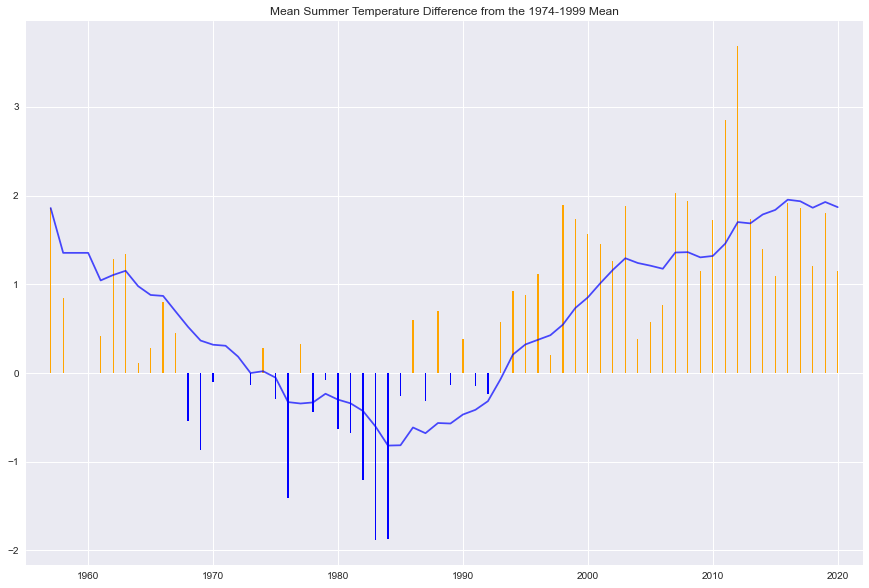

In [338]:
plt.style.use('seaborn')
fig = plt.subplots(figsize=(15, 10))

ax = summer_means['DEV'].plot(  kind='bar', 
                                color=summer_means.POSITIVE.map(
                                    {True: 'orange', False: 'b'}), 
                                width=0.1)
summer_means['ROLLING'].plot(kind='line', color='b', alpha=0.7)

# Format x-axis ticks and labels
ticks = [x for x in range(5,67,10)]
ax.set_xlim([0, 67])
ax.set_xticks(ticks)
ax.set_xticklabels([x+1955 for x in ticks], rotation=0)

ax.set_title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show()

We will first add Month row in order to later on group our dates

In [339]:
q3_data=combined_data.copy()
q3_data["DAY"] = q3_data.DATE.dt.day_of_year
q3_data["YEAR"] = q3_data.DATE.dt.year
q3_data = q3_data.sort_values('DATE')
q3_data["ROLLING"] = q3_data.TAVG.rolling(window=30, min_periods=1).mean()

q3_data = q3_data.pivot_table(index="DAY",columns="YEAR", values="ROLLING")
q3_data

YEAR,1957,1958,1959,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DAY,,,,,,,,,,,,,,,,,,,,,
1,NaN,11.503333,13.034483,12.000000,12.366667,11.560000,13.426667,12.763333,13.756667,12.746667,...,13.093333,12.683333,11.316667,10.473333,12.626667,10.896667,8.996667,11.960000,10.713333,12.340000
2,NaN,11.770000,13.153571,12.100000,12.283333,11.630000,13.430000,12.566667,13.726667,12.493333,...,12.806667,12.560000,11.186667,10.516667,12.116667,10.670000,8.806667,11.806667,10.606667,12.106667
3,NaN,12.020000,13.300000,12.600000,12.320000,11.703333,13.326667,12.453333,13.660000,12.376667,...,12.530000,12.426667,11.216667,10.620000,11.746667,10.600000,8.726667,11.693333,10.446667,11.983333
4,NaN,12.243333,13.453846,12.900000,12.220000,11.920000,13.110000,12.456667,13.630000,12.353333,...,12.410000,12.266667,11.190000,10.676667,11.580000,10.650000,8.730000,11.650000,10.210000,11.960000
5,NaN,12.346667,13.552000,13.380000,12.033333,12.110000,12.800000,12.503333,13.453333,12.236667,...,12.340000,12.020000,11.143333,10.713333,11.223333,10.820000,8.830000,11.710000,10.020000,11.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,10.636667,12.983333,NaN,12.766667,11.543333,13.956667,13.536667,13.773333,13.260000,12.900000,...,12.966667,12.320000,10.853333,13.990000,11.803333,9.983333,12.676667,10.710000,13.613333,14.086667
363,10.626667,13.086667,NaN,12.770000,11.413333,13.733333,13.476667,13.810000,13.113333,12.927273,...,12.793333,12.180000,10.910000,13.900000,11.703333,9.723333,12.693333,10.733333,13.160000,14.153333
364,10.776667,13.130000,NaN,12.676667,11.386667,13.583333,13.276667,13.873333,12.976667,12.913043,...,12.763333,11.943333,10.880000,13.483333,11.616667,9.466667,12.493333,10.796667,12.700000,14.153333


In [340]:
q3_avg = combined_data.copy()
q3_avg = q3_avg[(q3_avg.DATE.dt.year >= 1979) & 
                (q3_avg.DATE.dt.year <= 1999)]
q3_avg = q3_avg.groupby("DAY")
q3_avg = q3_avg.TAVG.mean()
q3_avg = pd.DataFrame(q3_avg)
q3_avg["ROLLING"] = q3_avg["TAVG"].rolling( window=30, 
                                            min_periods=1).mean()

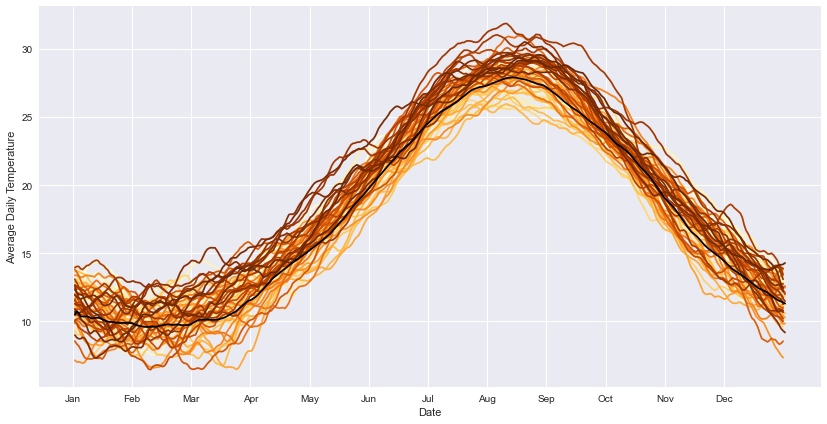

In [341]:
plt.style.use('seaborn')
plt.subplots(figsize=(14, 7))
ax = sns.lineplot(  data = q3_data, 
                    palette="YlOrBr", 
                    legend=None, 
                    dashes=False)

sns.lineplot(data=q3_avg["ROLLING"], color="black")

ax.set(ylabel="Average Daily Temperature", xlabel="Date")
ax.set_xticks(np.linspace(0,365,13)[:-1])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 
                    'May', 'Jun', 'Jul', 'Aug', 
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [342]:
q4_baseline = combined_data.copy()
q4_baseline["DAY"] = q4_baseline.DATE.dt.day_of_year

q4_baseline = q4_baseline[(q4_baseline.YEAR >= 1979) & (q4_baseline.YEAR <= 1999)]
q4_baseline
q4_baseline = pd.DataFrame(q4_baseline.groupby("DAY").mean()["TAVG"])
q4_baseline["DOY"] = q4_baseline.index
q4_baseline

q4 = combined_data.copy()
q4 = q4.pivot(index="DAY", columns="YEAR", values="TAVG")
q4["DOY"] = q4.index
q4 = q4.merge(q4_baseline, on="DOY").drop(columns="DOY")
q4.reset_index()
q4
nans = q4.isna().sum()
nans
q4 = q4.iloc[:, :-1].apply(lambda x: np.where(x > 1.1 * q4.TAVG, True, False), axis=0)
q4
q4 = pd.DataFrame(q4.sum() / (q4.count() - nans))
q4
q4.columns=(["EV_P"])
q4_avg_line = q4.mean()
q4.mean()

q4["ABOVE_AVG"] = q4["EV_P"] >= float(q4_avg_line)
# # q4

Q4

[5, 15, 25, 35, 45, 55, 65]
[1960, 1970, 1980, 1990, 2000, 2010, 2020]


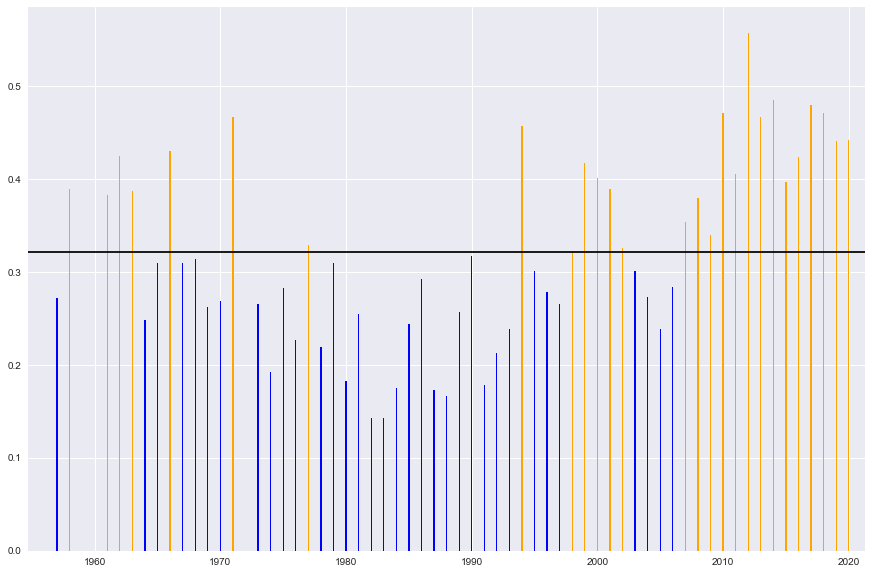

In [343]:
plt.style.use('seaborn')
fig1 = plt.subplots(figsize=(15, 10))

ax1 = q4['EV_P'].plot(kind='bar', color=q4.ABOVE_AVG.map({True: 'orange', False: 'b'}), width=0.1)
ax1.axhline(y=float(q4_avg_line), color='black', linestyle='-')
ticks1 = [x for x in range(5,67,10)]
print(ticks1)
print([x+1955 for x in ticks1])
ax1.set_xticks(ticks1)
ax1.set_xticklabels([x+1955 for x in ticks1], rotation=0)

plt.show()

Q5

In [344]:
q5 = combined_data[["DATE", "DAY", "YEAR", "PRCP"]].copy()
q5 = q5.pivot(index="DAY", columns="YEAR", values="PRCP")

yearly_prcp = pd.DataFrame({"TOTAL": q5.sum(), "COUNT": q5[q5 > 0].count()})
yearly_prcp["CONCENTRATION"] = yearly_prcp["TOTAL"] / yearly_prcp["COUNT"]

yearly_prcp["ROLLING_AVG"] = yearly_prcp["CONCENTRATION"].rolling(10, min_periods=1).mean()

yearly_prcp = yearly_prcp.reset_index()
# PROCESS OK CHECK DATA


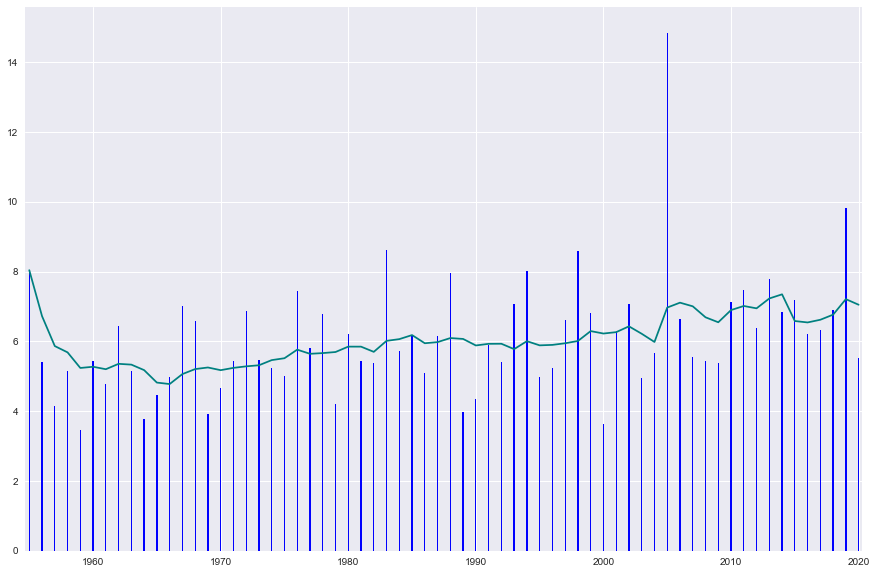

In [345]:
plt.style.use('seaborn')
fig1 = plt.subplots(figsize=(15, 10))

ax = yearly_prcp['ROLLING_AVG'].plot(kind='line', color='teal')
ax = yearly_prcp['CONCENTRATION'].plot(kind='bar', color="b", width=0.1)

# Format x-axis ticks and labels
ticks = [x for x in range(5,67,10)]
ax.set_xticks(ticks)
ax.set_xticklabels([x+1955 for x in ticks], rotation=0)

plt.show()